In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import SpreadOption as so
from matplotlib import cm
import warnings

warnings.filterwarnings('ignore')
%load_ext autoreload
%autoreload 2

%matplotlib ipympl

In [2]:
T = 1
X0 = 105
Y0 = 100
r = 0.03
qX = 0.10
qY = 0.05
DF = np.exp(-r*T)
forwardX = X0 * np.exp(-qX*T)/DF
forwardY = Y0 * np.exp(-qY*T)/DF
ivolX = 0.2
ivolY = 0.3

num_sims = 2**15-1
print(num_sims)

32767


Text(0, 0.5, 'Relative Difference')

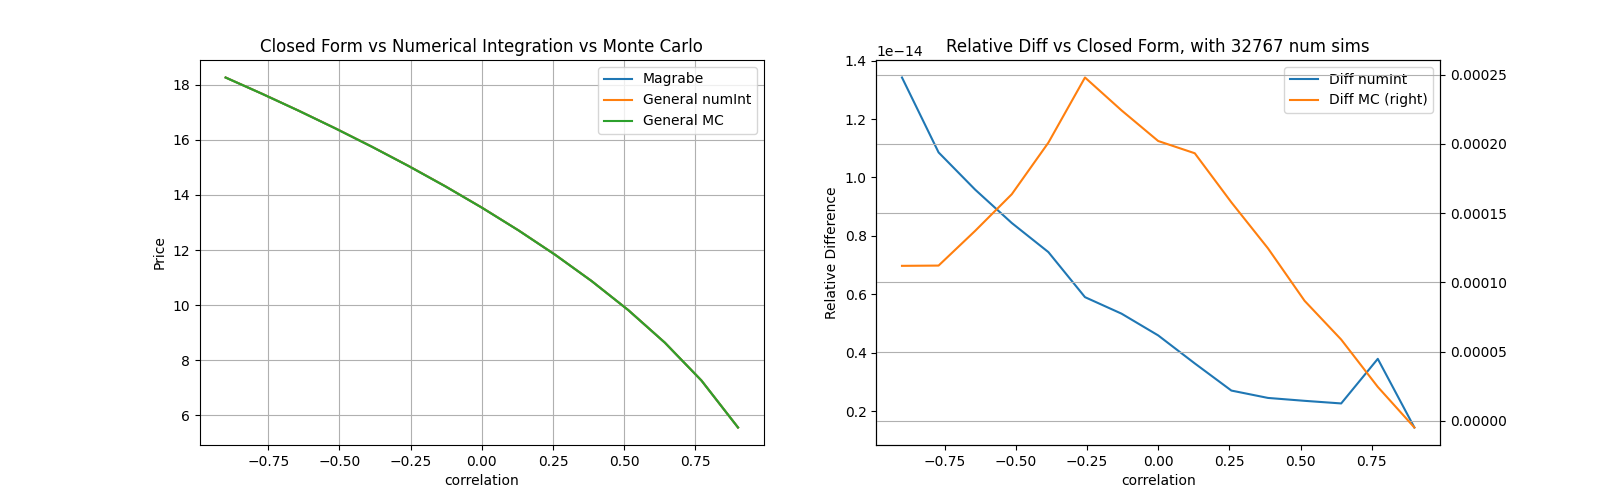

In [3]:
rhos = np.linspace(-0.9, 0.9, 15)
magrabe = [so.Magrabe(X0, Y0, qX, qY, ivolX, ivolY, rho_, T) for rho_ in rhos]
K = 0
general_so = [so.general_spread_option(X0, Y0, qX, qY, ivolX, ivolY, rho_, T, K, DF) for rho_ in rhos]
general_so_mc = [so.general_spread_option_MC(X0, Y0, qX, qY, ivolX, ivolY, rho_, T, K, DF, num_sims) for rho_ in rhos]

diff_int = [(m - so)/m for m, so in zip(magrabe, general_so)]
diff_mc = [(m - so)/m for m, so in zip(magrabe, general_so_mc)]

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16,5))

output = np.array([rhos, magrabe, general_so, general_so_mc])
output = np.transpose(output)
df = pd.DataFrame(output, columns=['correlation', 'Magrabe', 'General numInt', 'General MC'])
df = df.set_index('correlation')
df.plot(ax=axes[0], grid=True)

output2 = np.array([rhos, diff_int, diff_mc])
output2 = np.transpose(output2)
df2 = pd.DataFrame(output2, columns=['correlation', 'Diff numInt', 'Diff MC'])
df2 = df2.set_index('correlation')
df2.plot(secondary_y=['Diff MC'], ax=axes[1], grid=True)

axes[0].set_title('Closed Form vs Numerical Integration vs Monte Carlo')
axes[0].set_ylabel('Price')
axes[1].set_title('Relative Diff vs Closed Form, with 32767 num sims')
axes[1].set_ylabel('Relative Difference')
#plt.savefig("L4_SpreadOption1.png")

### Price for various Strikes and rhos

In [4]:
rhos = np.linspace(-0.9, 0.9, 15)
Ks = np.linspace(0, 40, 15)
df = pd.DataFrame()
df['Strike'] = Ks
for rho in rhos:    
    general_so = [so.general_spread_option(X0, Y0, qX, qY, ivolX, ivolY, rho, T, K, DF) for K in Ks]   
    df['rho = ' + str(rho)] = np.array(general_so)  

df = df.set_index('Strike')

Text(0.5, 0.5, 'correlation')

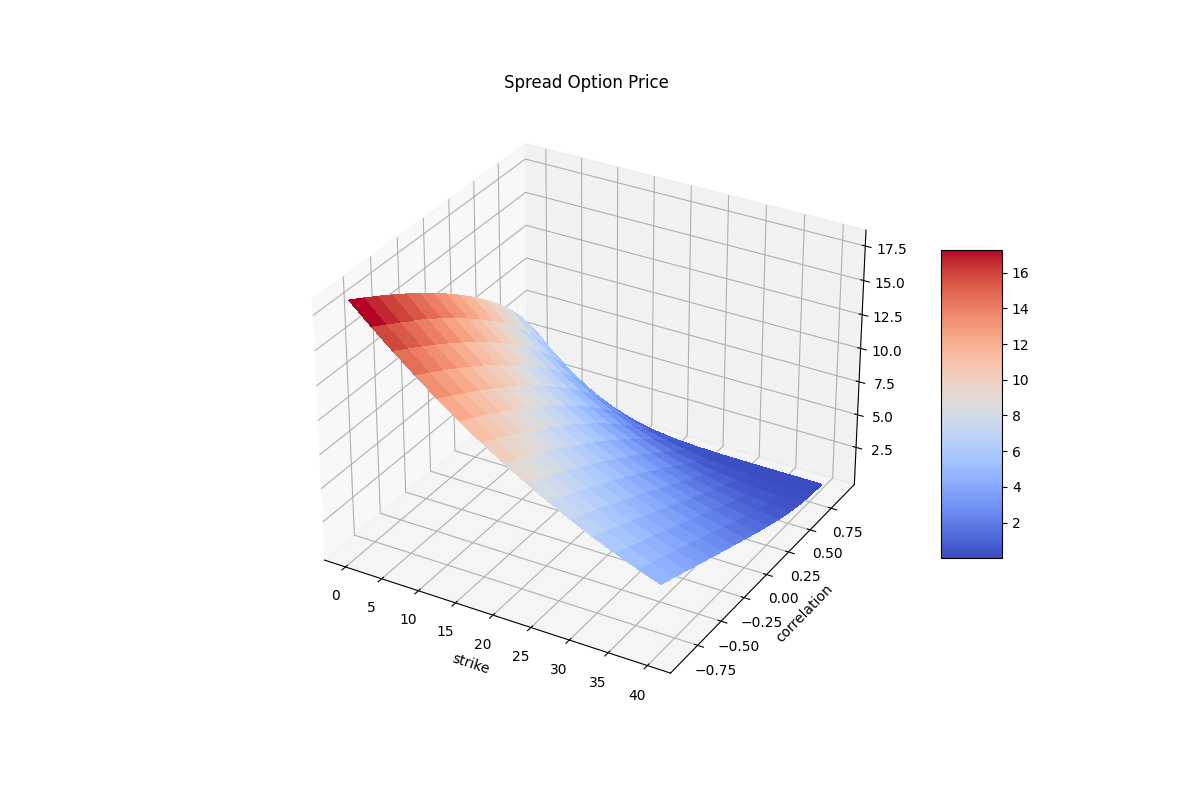

In [5]:
y = np.array(rhos)
x = np.array(Ks)
X,Y = np.meshgrid(x,y)
Z = np.transpose(df.to_numpy())
fig = plt.figure(figsize = (12, 8))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm, linewidth=0, antialiased=False)
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.title('Spread Option Price')
ax.set_xlabel('strike')
ax.set_ylabel('correlation')
#plt.savefig("L4_SpreadOption3D.png")

### Delta Forward X for various Strikes and rhos

In [6]:
rhos = np.linspace(-0.9, 0.9, 15)
Ks = np.linspace(0, 40, 15)
dfDeltaFX = pd.DataFrame()
dfDeltaFX['Strike'] = Ks
for rho in rhos:    
    general_so = [so.general_spread_option_deltaFX(X0, Y0, qX, qY, ivolX, ivolY, rho, T, K, DF) for K in Ks]   
    dfDeltaFX['rho = ' + str(rho)] = np.array(general_so)  

dfDeltaFX = dfDeltaFX.set_index('Strike')

Text(0.5, 0.5, 'correlation')

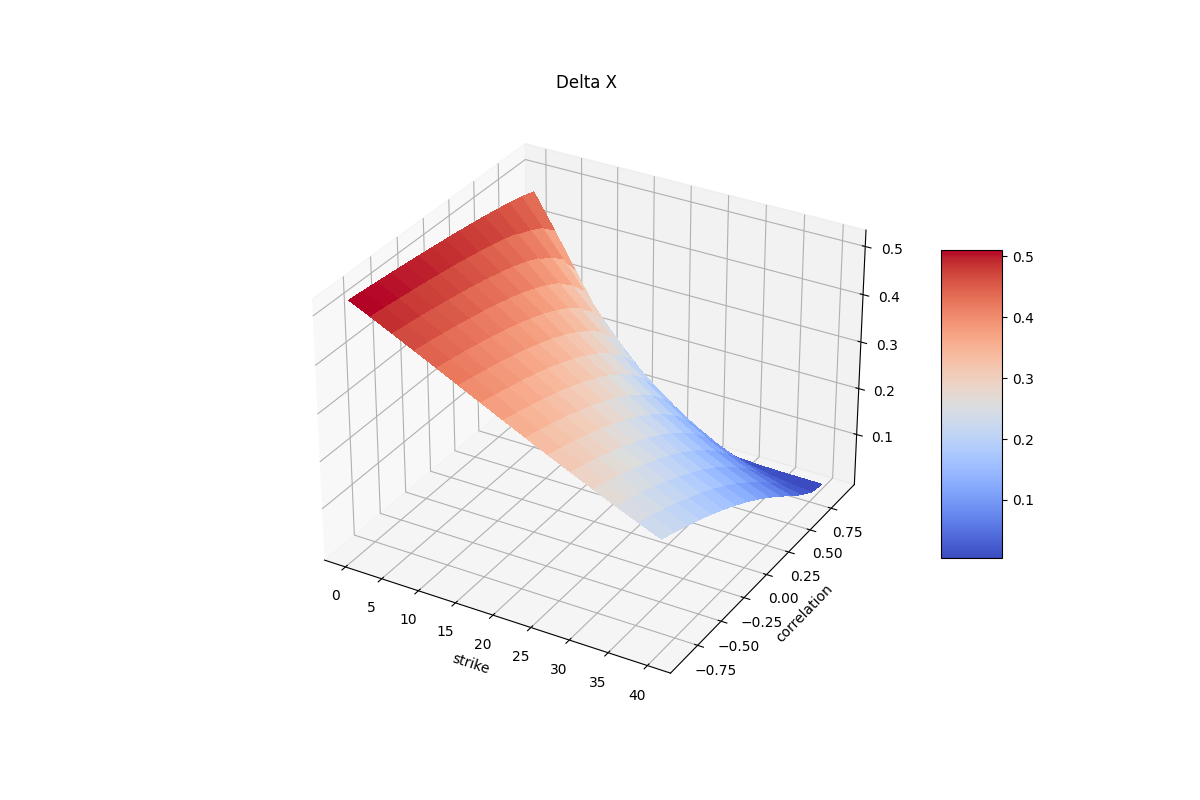

In [7]:
y = np.array(rhos)
x = np.array(Ks)
X,Y = np.meshgrid(x,y)
Z = np.transpose(dfDeltaFX.to_numpy())
fig = plt.figure(figsize = (12, 8))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm, linewidth=0, antialiased=False)
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.title('Delta X')
ax.set_xlabel('strike')
ax.set_ylabel('correlation')
#plt.savefig("L4_SpreadOption3D_DeltaX.png")

### Delta Forward Y for various Strikes and rhos

In [8]:
rhos = np.linspace(-0.9, 0.9, 15)
Ks = np.linspace(0, 40, 15)
dfDeltaFY = pd.DataFrame()
dfDeltaFY['Strike'] = Ks
for rho in rhos:    
    general_so = [so.general_spread_option_deltaFY(X0, Y0, qX, qY, ivolX, ivolY, rho, T, K, DF) for K in Ks]   
    dfDeltaFY['rho = ' + str(rho)] = np.array(general_so)  

dfDeltaFY = dfDeltaFY.set_index('Strike')

Text(0.5, 0.5, 'correlation')

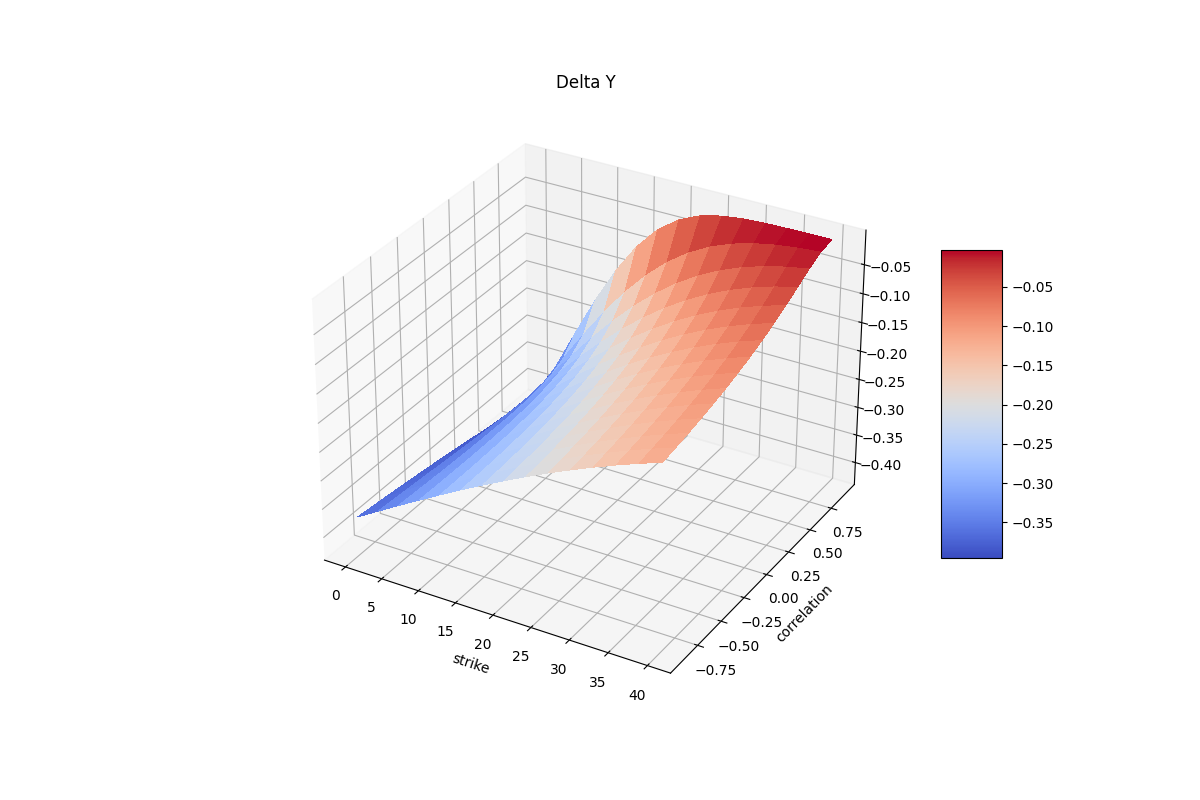

In [9]:
y = np.array(rhos)
x = np.array(Ks)
X,Y = np.meshgrid(x,y)
Z = np.transpose(dfDeltaFY.to_numpy())
fig = plt.figure(figsize = (12, 8))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm, linewidth=0, antialiased=False)
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.title('Delta Y')
ax.set_xlabel('strike')
ax.set_ylabel('correlation')
#plt.savefig("L4_SpreadOption3D_DeltaY.png")

### Vega X for various Strikes and rhos

In [10]:
rhos = np.linspace(-0.9, 0.9, 15)
Ks = np.linspace(0, 40, 15)
dfvegaX = pd.DataFrame()
dfvegaX['Strike'] = Ks
for rho in rhos:    
    general_so = [so.general_spread_option_vegaX(X0, Y0, qX, qY, ivolX, ivolY, rho, T, K, DF) for K in Ks]   
    dfvegaX['rho = ' + str(rho)] = np.array(general_so)  

dfvegaX = dfvegaX.set_index('Strike')

Text(0.5, 0.5, 'strike')

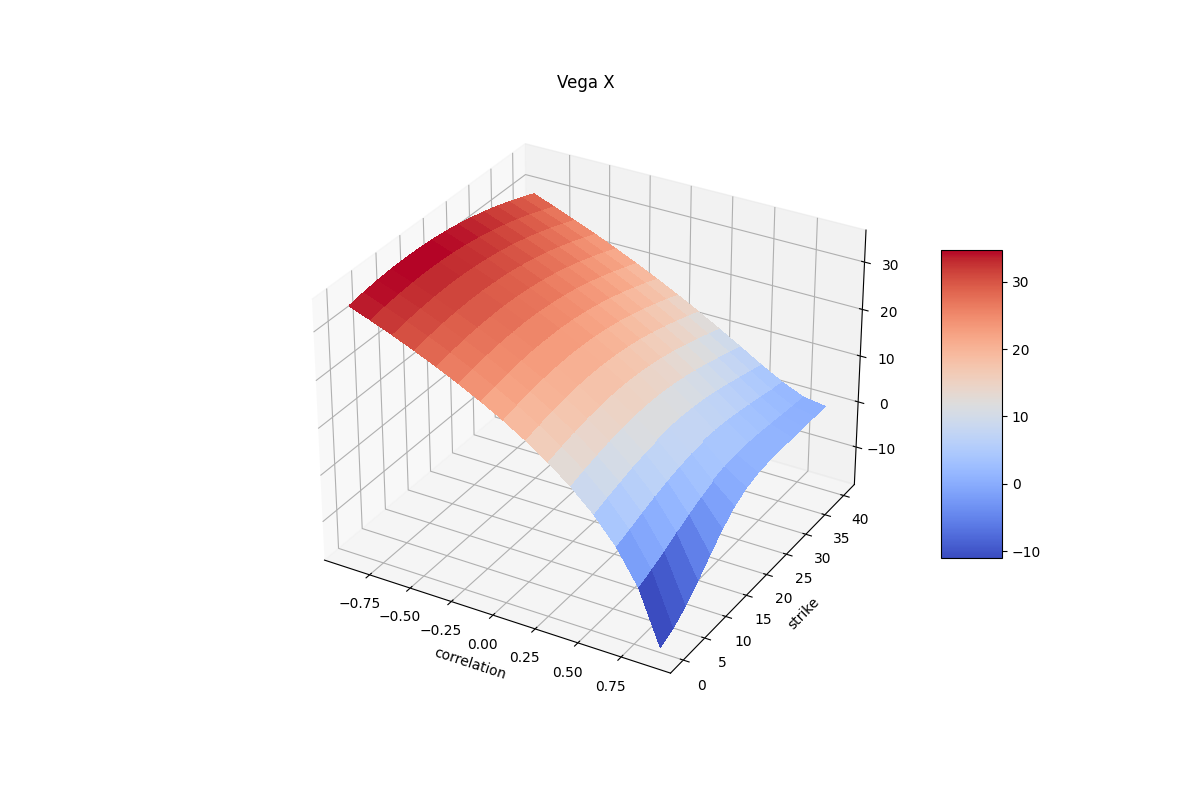

In [11]:
x = np.array(rhos)
y = np.array(Ks)
X,Y = np.meshgrid(x,y)
Z = dfvegaX.to_numpy()
fig = plt.figure(figsize = (12, 8))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm, linewidth=0, antialiased=False)
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.title('Vega X')
ax.set_xlabel('correlation')
ax.set_ylabel('strike')
#plt.savefig("L4_SpreadOption3D_VegaX.png")

### Vega Y for various Strikes and rhos

In [12]:
rhos = np.linspace(-0.9, 0.9, 15)
Ks = np.linspace(0, 40, 15)
dfvegaY = pd.DataFrame()
dfvegaY['Strike'] = Ks
for rho in rhos:    
    general_so = [so.general_spread_option_vegaY(X0, Y0, qX, qY, ivolX, ivolY, rho, T, K, DF) for K in Ks]   
    dfvegaY['rho = ' + str(rho)] = np.array(general_so)  

dfvegaY = dfvegaY.set_index('Strike')

Text(0.5, 0.5, 'strike')

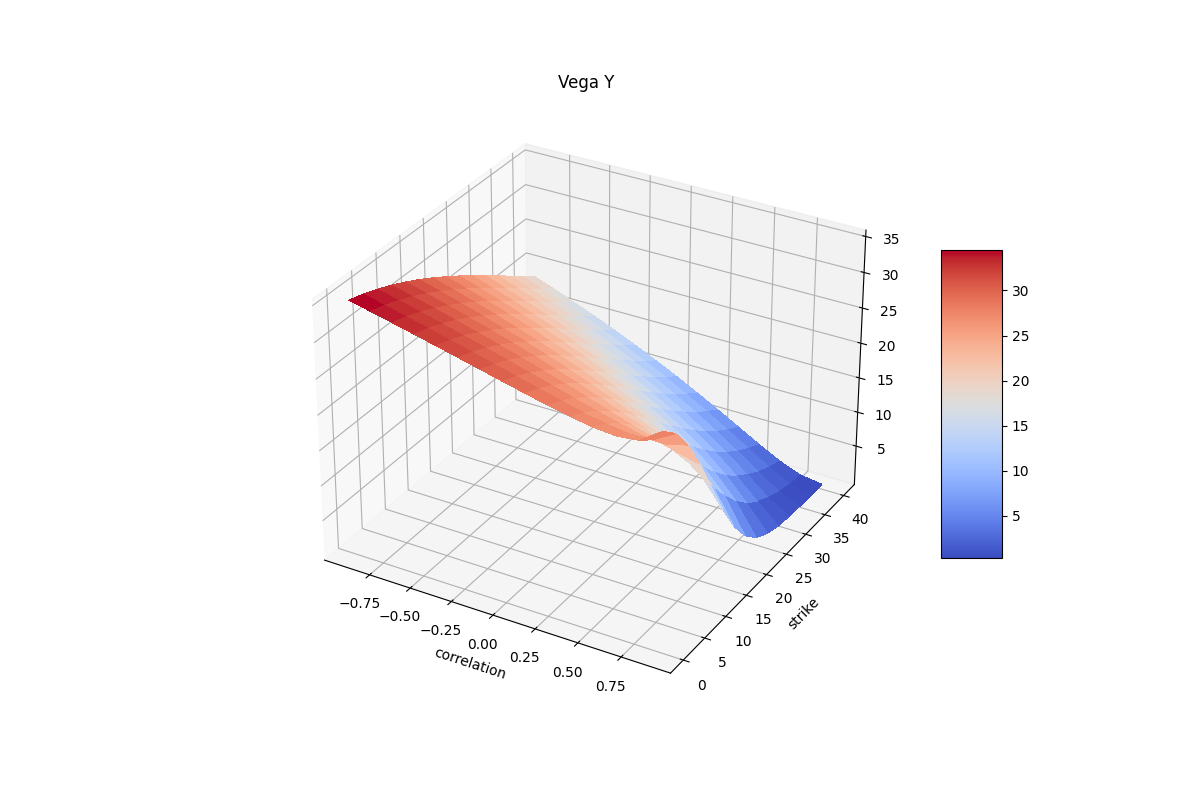

In [13]:
x = np.array(rhos)
y = np.array(Ks)
X,Y = np.meshgrid(x,y)
Z = dfvegaY.to_numpy()
fig = plt.figure(figsize = (12, 8))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm, linewidth=0, antialiased=False)
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.title('Vega Y')
ax.set_xlabel('correlation')
ax.set_ylabel('strike')
#plt.savefig("L4_SpreadOption3D_VegaY.png")

### Rho risk for various Strikes and rhos

In [14]:
rhos = np.linspace(-0.9, 0.9, 15)
Ks = np.linspace(0, 40, 15)
dfRhoRisk = pd.DataFrame()
dfRhoRisk['Strike'] = Ks
for rho in rhos:    
    general_so = [so.general_spread_option_RhoRisk(X0, Y0, qX, qY, ivolX, ivolY, rho, T, K, DF) for K in Ks]   
    dfRhoRisk['rho = ' + str(rho)] = np.array(general_so)  

dfRhoRisk = dfRhoRisk.set_index('Strike')

Text(0.5, 0.5, 'strike')

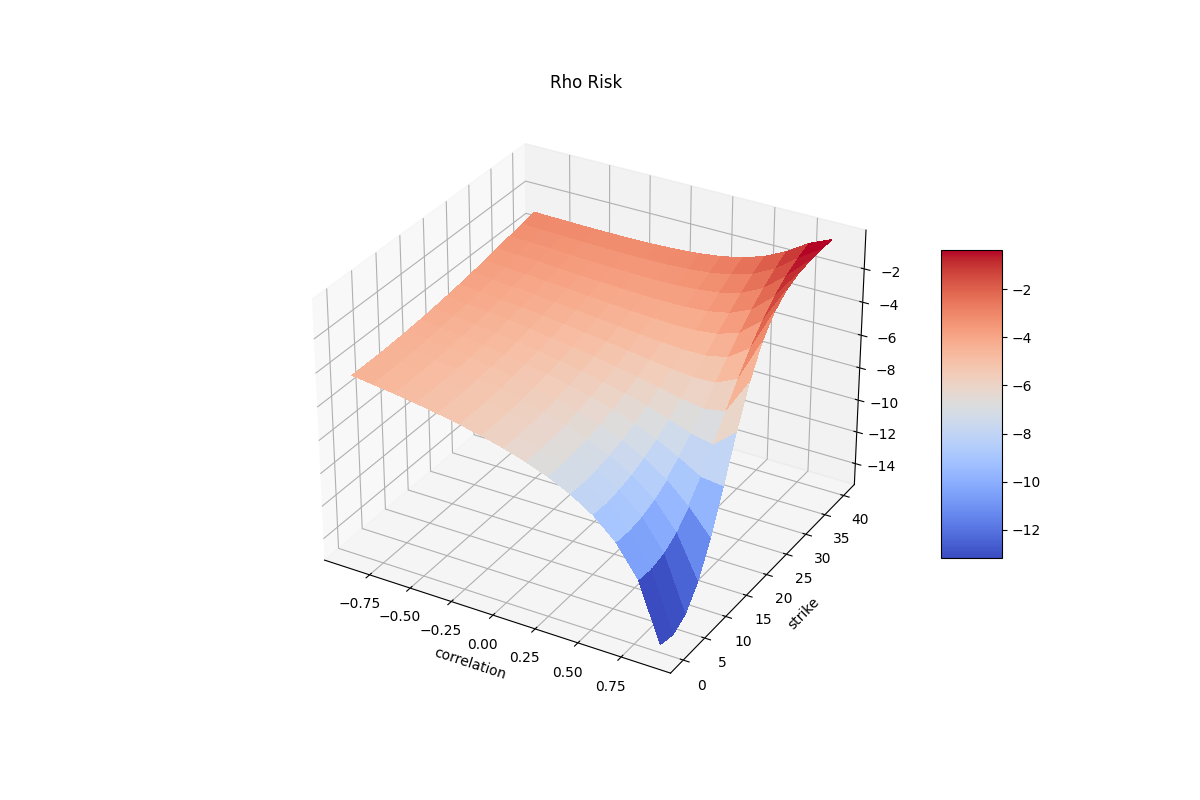

In [15]:
x = np.array(rhos)
y = np.array(Ks)
X,Y = np.meshgrid(x,y)
Z = dfRhoRisk.to_numpy()
fig = plt.figure(figsize = (12, 8))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm, linewidth=0, antialiased=False)
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.title('Rho Risk')
ax.set_xlabel('correlation')
ax.set_ylabel('strike')
#plt.savefig("L4_SpreadOption3D_Rho.png")